***

<h1 style="text-align: center; background-color: #D2B48C; height: 37px; ">📚 Katalog Książek 📚</h1>

<h3 style="text-align: center; background-color: #FFFAF0; height: 27px; ">🖋️ Liliana Kołczyk 🖋️</h3>

---

<h2 style="height: 32px; background-color: #F5F5DC;">1. 💻 Część kodowa:</h2>

### Importowanie niezbędnych bibliotek:

In [3]:
import requests # Biblioteka requests: Służy do wykonywania zapytań HTTP, np. do pobierania danych z API lub stron internetowych
import pandas as pd # Biblioteka pandas: Narzędzie do analizy danych, umożliwia pracę z tabelami danych (DataFrame) i seriami (Series)
from tabulate import tabulate # Biblioteka tabulate: Ułatwia formatowanie danych w czytelne tabele, przydatne do prezentacji w konsoli lub plikach
import matplotlib.pyplot as plt # Biblioteka matplotlib.pyplot: Służy do tworzenia wykresów i wizualizacji danych w Pythonie

### Tworzenie lokalnego katalogu książek jako DataFrame

In [205]:
local_catalog = pd.DataFrame(columns=["Tytuł", "Autor", "Rok wydania", "ISBN"])

### 📗 Funkcja do wyszukania książek w bazie API 📗

In [207]:
def search_books(query):
    url = f"https://openlibrary.org/search.json?q={query}" # URL do zapytania do Open Library API z wprowadzonym zapytaniem
    response = requests.get(url) # Zapytanie HTTP GET do API
    if response.status_code == 200: # Sprawdzenie, czy zapytanie zakończyło się sukcesem, status kod 200 - poprawnie wykonane zapytanie
        books = response.json().get('docs', []) # Pobieranie listy książek z klucza 'docs' w odpowiedzi JSON (lub pustą listę, jeśli brak wyników)
        results = []
        for book in books[:10]:  # Ograniczenie do 10 wyników
            title = book.get('title', 'Brak tytułu') # Pobieranie tytułu, autora, roku wydania i ISBN oraz ich domyślnych wartości zastępczych
            author = ', '.join(book.get('author_name', ['Nieznany autor']))
            publish_year = book.get('first_publish_year', 'Nieznany rok')
            isbn = book.get('isbn', ['Brak ISBN'])[0]
            results.append({  # Stworzenie słownika
                'Tytuł': title,
                'Autor': author,
                'Rok wydania': publish_year,
                'ISBN': isbn
            })
        return pd.DataFrame(results) # Zwracanie wyników
    else: # Uwzględnienie przyadku w którym wystąpi błąd połączenia oraz podanie informacji na jego temat
        print("Błąd podczas łączenia z Open Library API.")
        return pd.DataFrame()

In [284]:
query = input("Wprowadź tytuł lub autora: ") # Zapytanie o dane książki do wyszukania 
search_results = search_books(query) # Utworzenie zmiennej przechowującej wyszukane książki
if not search_results.empty: # Instrukcja warunkowa sprawdzająca, czy zmienna posiada jakieś wyniki wyszukiwania
    print(tabulate(search_results, headers="keys", tablefmt="grid")) # Wyświetlenie zmiennej w formie tabeli, dopasowanie nagłówków i format siatki
else:  # Uwzględnienie przypadku, w którym nie została znaleziona żadna książka w bazie
    print("Nie znaleziono książek.")

Wprowadź tytuł lub autora:  Makbet


+----+--------------------------+----------------------------+---------------+---------------+
|    | Tytuł                    | Autor                      | Rok wydania   | ISBN          |
+====+==========================+============================+===============+===============+
|  0 | Macbeth                  | William Shakespeare        | 1508          | 9780934048033 |
+----+--------------------------+----------------------------+---------------+---------------+
|  1 | Maḳ-beṭ                  | Eugène Ionesco             | 1975          | Brak ISBN     |
+----+--------------------------+----------------------------+---------------+---------------+
|  2 | Maḳbet                   | William Shakespeare        | 1999          | Brak ISBN     |
+----+--------------------------+----------------------------+---------------+---------------+
|  3 | Makbet                   | Iu Nesbe                   | 2018          | 5040929242    |
+----+--------------------------+-----------------

### 📙 Fukcja dodania ksiązki do katalogu lokalnego 📙 

In [210]:
def add_to_catalog(book):
    global local_catalog # Deklaracja zmiennej globalnej potrzebnej do modyfikacji katalogu
    local_catalog = pd.concat([local_catalog, book], ignore_index=True) # Połączenie istniejącego katalogu z nowym wpisem (indeksy są przeliczane od nowa)

In [286]:
if not search_results.empty: # Instrukcja warunkowa sprawdzająca, czy zmienna nie jest pusta
    print(tabulate(search_results, headers="keys", tablefmt="grid")) # Wyświetlenie zmiennej w formie tabeli, dopasowanie nagłówków i format siatki
    index = int(input("Wybierz numer książki do dodania (0-9): ")) # Zmienna zawierająca zapytanie o numer książki, która zostanie dodana do katalogu
    if 0 <= index < len(search_results): # Instrukcja warunkowa sprawdzająca, czy zmienna indeks znajduje się w danym przedziale (od 0 do liczby wierszy w katalogu)
        add_to_catalog(search_results.iloc[[index]]) # Funkcja dodania książki do katalogu przy użyciu iloc 
        print(f"Książka '{search_results.iloc[index]['Tytuł']}' została dodana do katalogu.") # Informacja o poprawnym wykonaniu operacji oraz wyświetlenie danych dodanej książki
    else: # Uwzględnienie przypadku, w którym został podany nieprawidłowy numer książki
        print("Nieprawidłowy wybór.")

+----+--------------------------+----------------------------+---------------+---------------+
|    | Tytuł                    | Autor                      | Rok wydania   | ISBN          |
+====+==========================+============================+===============+===============+
|  0 | Macbeth                  | William Shakespeare        | 1508          | 9780934048033 |
+----+--------------------------+----------------------------+---------------+---------------+
|  1 | Maḳ-beṭ                  | Eugène Ionesco             | 1975          | Brak ISBN     |
+----+--------------------------+----------------------------+---------------+---------------+
|  2 | Maḳbet                   | William Shakespeare        | 1999          | Brak ISBN     |
+----+--------------------------+----------------------------+---------------+---------------+
|  3 | Makbet                   | Iu Nesbe                   | 2018          | 5040929242    |
+----+--------------------------+-----------------

Wybierz numer książki do dodania (0-9):  4


Książka 'Makbet' została dodana do katalogu.


### 📘 Fukcja wyświetlenia książek w lokalnym katalogu 📘

In [213]:
def show_local_catalog():
    global local_catalog # Deklaracja zmiennej globalnej potrzebnej do modyfikacji katalogu
    if local_catalog.empty: # Instrukcja warunkowa sprawdzająca, czy katalog lokalny jest pusty oraz informująca o tym
        print("Katalog jest pusty.")
    else:
        print(tabulate(local_catalog, headers="keys", tablefmt="grid")) # Wyświetlenie katalogu w formie tabeli, dopasowanie nagłówków i format siatki

In [214]:
show_local_catalog() # Wywołanie funkcji

+----+------------+----------------+---------------+---------------+
|    | Tytuł      | Autor          |   Rok wydania |          ISBN |
+====+============+================+===============+===============+
|  0 | The Hobbit | J.R.R. Tolkien |          1937 | 9780582186552 |
+----+------------+----------------+---------------+---------------+


### 📕 Fukcja zapisu katalogu lokalnego do pliku CSV 📕

In [216]:
def save_catalog_to_file(filename):
    global local_catalog # Deklaracja zmiennej globalnej potrzebnej do modyfikacji katalogu
    if local_catalog.empty: # Instrukcja warunkowa sprawdzająca, czy katalog lokalny jest pusty oraz informująca o tym
        print("Katalog jest pusty.")
    else:
        local_catalog.to_csv(filename, index=False) # Zapis katalogu do pliku CSV, bez dołączania indeksów (czystszy format danych) oraz informacja o pomyślnym zapisie
        print(f"Katalog został zapisany do pliku: {filename}")

In [217]:
filename = input("Podaj nazwę pliku (np. katalog.csv): ") # Zmienna zawierająca zapytanie o nazwę pliku do zapisu
save_catalog_to_file(filename) # Wywołanie funkcji z wyżej podaną zmienną 

Podaj nazwę pliku (np. katalog.csv):  katalog3.csv


Katalog został zapisany do pliku: katalog3.csv


### 📓 Funkcja filtrowania katalogu lokalnego na podstawie autora 📓

In [219]:
def filter_catalog_by_author(author):
    global local_catalog # Deklaracja zmiennej globalnej potrzebnej do modyfikacji katalogu
    filtered = local_catalog[local_catalog["Autor"].str.contains(author, case=False, na=False)] # Stworzenie zmiennej filtrującej katalog książek według podanego autora
    if filtered.empty: # Instrukcja warunkowa sprawdzająca, czy zmienna filtered jest pusta oraz informująca o tym
        print("Nie znaleziono książek dla podanego autora.")
    else:
        print(tabulate(filtered, headers="keys", tablefmt="grid")) # Wyświetlenie zmiennej w formie tabeli, dopasowanie nagłówków i format siatki

In [220]:
author = input("Wprowadź nazwisko autora: ") # Zmienna zawierająca zapytanie o nazwisko autora
filter_catalog_by_author(author) # Wywołanie funkcji z wyżej podaną zmienną 

Wprowadź nazwisko autora:  J.R.R. Tolkien


+----+------------+----------------+---------------+---------------+
|    | Tytuł      | Autor          |   Rok wydania |          ISBN |
+====+============+================+===============+===============+
|  0 | The Hobbit | J.R.R. Tolkien |          1937 | 9780582186552 |
+----+------------+----------------+---------------+---------------+


### 📔 Fukcja usuwania książki z katalogu lokalnego na podstawie jej indeksu 📔

In [222]:
def delete_book_from_catalog(index):
    global local_catalog # Deklaracja zmiennej globalnej potrzebnej do modyfikacji katalogu
    if 0 <= index < len(local_catalog): # Instrukcja warunkowa sprawdzająca, czy zmienna indeks znajduje się w danym przedziale (od 0 do liczby wierszy w katalogu)
        deleted = local_catalog.iloc[index] # Pobieranie szczegółów książki na podstawie indeksu przy użyciu iloc i zapisanie ich do zmiennej aby wyświetlić dane usuniętej ksiązki
        local_catalog = local_catalog.drop(index).reset_index(drop=True) # Usunięcie książki z katalogu lokalnego, resetując indeksy, aby były ciągłe po usunięciu
        print(f"Usunięto książkę: {deleted['Tytuł']} ({deleted['Autor']})") # Wyświetlenie danych usuniętej książki oraz informacja o poprawnym wykonaniu operacji
    else: # Uwzględnienie przypadku w którym zmienna indeks ma nieprawidłową wartość
        print("Nieprawidłowy indeks.") 

In [223]:
show_local_catalog() # Wywołanie funkcji
index = int(input("Podaj numer książki do usunięcia: ")) # Zmienna zawierająca zapytanie o numer książki
delete_book_from_catalog(index) # Wywołanie funkcji z wyżej podaną zmienną 

+----+------------+----------------+---------------+---------------+
|    | Tytuł      | Autor          |   Rok wydania |          ISBN |
+====+============+================+===============+===============+
|  0 | The Hobbit | J.R.R. Tolkien |          1937 | 9780582186552 |
+----+------------+----------------+---------------+---------------+


Podaj numer książki do usunięcia:  0


Usunięto książkę: The Hobbit (J.R.R. Tolkien)


---

<h2 style="height: 32px; background-color: #F5F5DC;">2. 📊 Część analizy danych:</h2>

<h3 style="text-align: center; background-color: #DEB887; height: 24px; ">Wykres słupkowy poziomy: Liczba książek na autora</h3>

### Definiowanie funkcji

In [228]:
def horizontal_bar_chart_books_per_author():
    if local_catalog.empty: # Instrukcja warunkowa sprawdzająca, czy katalog jest pusty
        print("Katalog jest pusty. Nie można wygenerować wykresu.")
        return
    
    author_counts = local_catalog["Autor"].value_counts() # Zmienna zawierająca liczbę wystąpienia każdego autora w kolumnie "Autor"
    plt.figure(figsize=(10, 6)) # Stworzenie figury
    author_counts.plot(kind='barh', color='purple') # Rysowanie wykresu poziomego z fioletowymi słupkami
    plt.title("Liczba książek na autora") # Tytuł wykresu
    plt.xlabel("Liczba książek") # Oś X
    plt.ylabel("Autor") # Oś Y
    plt.tight_layout() # Dostosowanie układu, aby wszystkie elementy wykresu były widoczne
    plt.show() # Wyświetlenie wykresu

### Wywołanie funkcji oraz wyświetlenie jej efektu

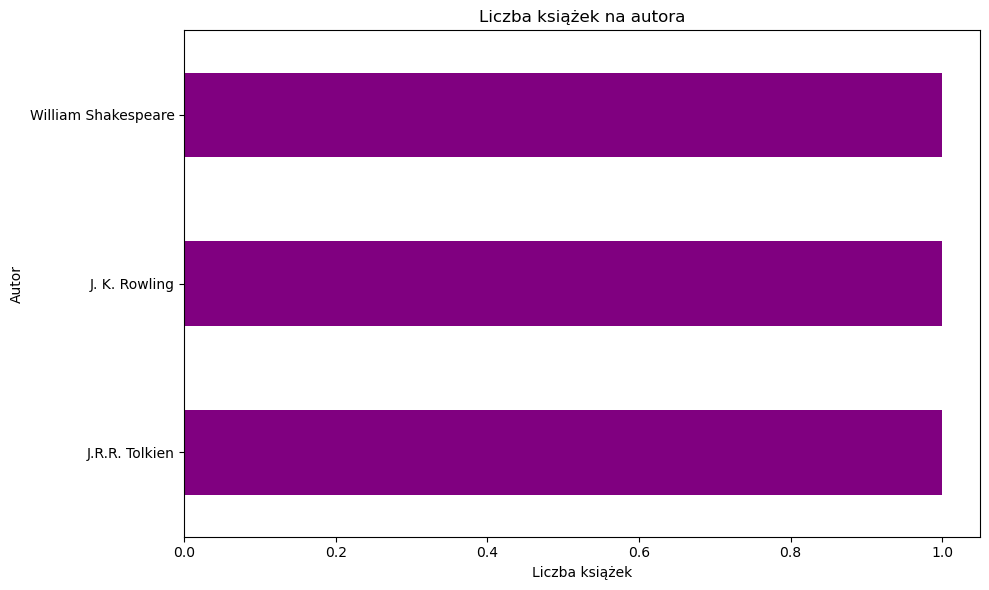

In [288]:
horizontal_bar_chart_books_per_author()

<h3 style="text-align: center; background-color: #DEB887; height: 24px; ">Wykres kołowy: Udział książek autorów w katalogu</h3>

### Definiowanie funkcji

In [233]:
def pie_chart_books_per_author():
    if local_catalog.empty:  # Instrukcja warunkowa sprawdzająca, czy katalog jest pusty
        print("Katalog jest pusty. Nie można wygenerować wykresu.")
        return
    
    author_counts = local_catalog["Autor"].value_counts() # Zmienna zawierająca liczbę wystąpienia każdego autora w kolumnie "Autor"
    plt.figure(figsize=(8, 8)) # Stworzenie figury
    author_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors) # Generowanie wykresu kołowego 
    plt.title("Udział książek autorów w katalogu") # Tytuł wykresu
    plt.ylabel("")  # Usunięcie etykiety na osi Y
    plt.show() # Wyświetlenie wykresu

### Wywołanie funkcji oraz wyświetlenie jej efektu

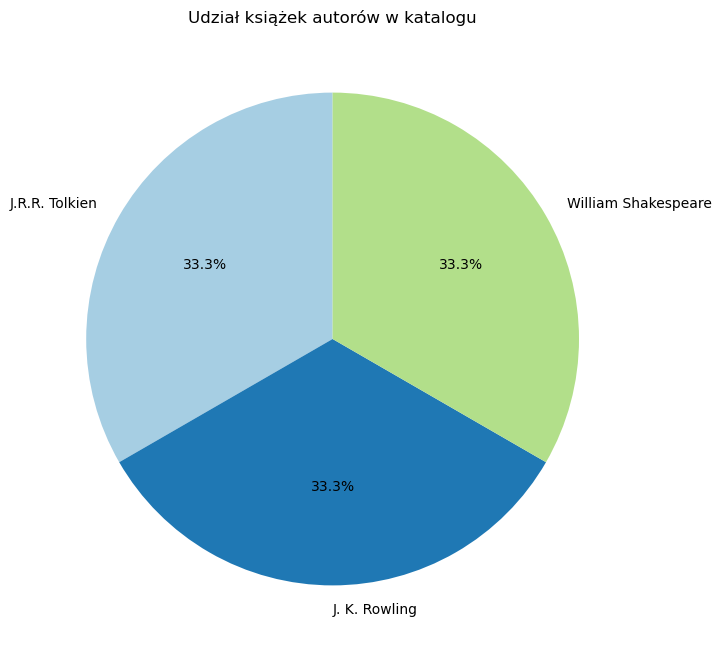

In [290]:
pie_chart_books_per_author()

<h3 style="text-align: center; background-color: #DEB887; height: 24px;">Znajdź najstarsze i najnowsze książki w katalogu</h3>

### Definiowanie funkcji

In [238]:
def oldest_and_newest_books():
    if local_catalog.empty:  # Instrukcja warunkowa sprawdzająca, czy katalog jest pusty
        print("Katalog jest pusty. Brak danych do analizy.")
        return
    
    local_catalog["Rok wydania"] = pd.to_numeric(local_catalog["Rok wydania"], errors='coerce') # Konwertowanie kolumny "Rok wydania" na wartości numeryczne i zastąpienie błędnych wartości (np. teksty) wartością NaN
    oldest = local_catalog.loc[local_catalog["Rok wydania"].idxmin()] # Znalezienie wiersza odpowiadającego najstarszej książce na podstawie minimalnego roku wydania
    newest = local_catalog.loc[local_catalog["Rok wydania"].idxmax()] # Znalezienie wiersza odpowiadającego najnowszej książce na podstawie maksymalnego roku wydania
    print("Najstarsza książka w katalogu:") # Wyświetlenie szczegółów najstarszej książki
    print(oldest)
    print("\nNajnowsza książka w katalogu:") # Wyświetlenie szczegółów najnowszej książki
    print(newest)

### Wywołanie funkcji oraz wyświetlenie jej efektu

In [292]:
oldest_and_newest_books()

Najstarsza książka w katalogu:
Tytuł              The Hobbit
Autor          J.R.R. Tolkien
Rok wydania              1937
ISBN            9780582186552
Name: 0, dtype: object

Najnowsza książka w katalogu:
Tytuł           Harry Potter
Autor          J. K. Rowling
Rok wydania             2001
ISBN           9780747575443
Name: 1, dtype: object


<h3 style="text-align: center; background-color: #DEB887; height: 24px; ">Analiza brakujących numerów ISBN</h3>

### Definiowanie funkcji

In [243]:
def missing_isbn_analysis():
    if local_catalog.empty: # Instrukcja warunkowa sprawdzająca, czy katalog jest pusty
        print("Katalog jest pusty. Brak danych do analizy.")
        return
    
    missing_isbn = local_catalog[local_catalog["ISBN"] == "Brak ISBN"] # Filtrowanie katalogu, aby znaleźć książki, które mają w kolumnie "ISBN" wartość "Brak ISBN"
    print(f"Liczba książek bez ISBN: {len(missing_isbn)}") # Wyświetlenie liczby książek bez ISBN
    if not missing_isbn.empty: # Instrukcja warunkowa wyświetlająca szczegóły książek bez ISBN
        print("Książki bez numeru ISBN:")
        print(tabulate(missing_isbn, headers="keys", tablefmt="grid")) # Wyświetlenie zmiennej w formie tabeli, dopasowanie nagłówków i format siatki

### Wywołanie funkcji oraz wyświetlenie jej efektu

In [294]:
missing_isbn_analysis()

Liczba książek bez ISBN: 1
Książki bez numeru ISBN:
+----+---------+---------------------+---------------+-----------+
|    | Tytuł   | Autor               |   Rok wydania | ISBN      |
+====+=========+=====================+===============+===========+
|  2 | Makbet  | William Shakespeare |          1950 | Brak ISBN |
+----+---------+---------------------+---------------+-----------+


<h3 style="text-align: center; background-color: #DEB887; height: 24px; ">Histogram: Rozkład liczby książek na lata wydania</h3>

### Definiowanie funkcji

In [248]:
def histogram_publication_years():
    if local_catalog.empty: # Instrukcja warunkowa sprawdzająca, czy katalog jest pusty
        print("Katalog jest pusty. Nie można wygenerować wykresu.")
        return
    
    local_catalog["Rok wydania"] = pd.to_numeric(local_catalog["Rok wydania"], errors='coerce') # Konwertowanie kolumny "Rok wydania" na wartości numeryczne i zastąpienie błędnych wartości (np. teksty) wartością NaN
    plt.figure(figsize=(10, 6)) # Tworzenie figury
    plt.hist(local_catalog["Rok wydania"].dropna(), bins=10, color='orange', edgecolor='black') # Tworzenie histogramu
    plt.title("Rozkład liczby książek na lata wydania") # Tytuł wykresu
    plt.xlabel("Rok wydania") # Oś X
    plt.ylabel("Liczba książek") # Oś Y
    plt.grid(True) # Dodanie siatki do wykresu
    plt.show() # Wyświetlenie wykresu

### Wywołanie funkcji oraz wyświetlenie jej efektu

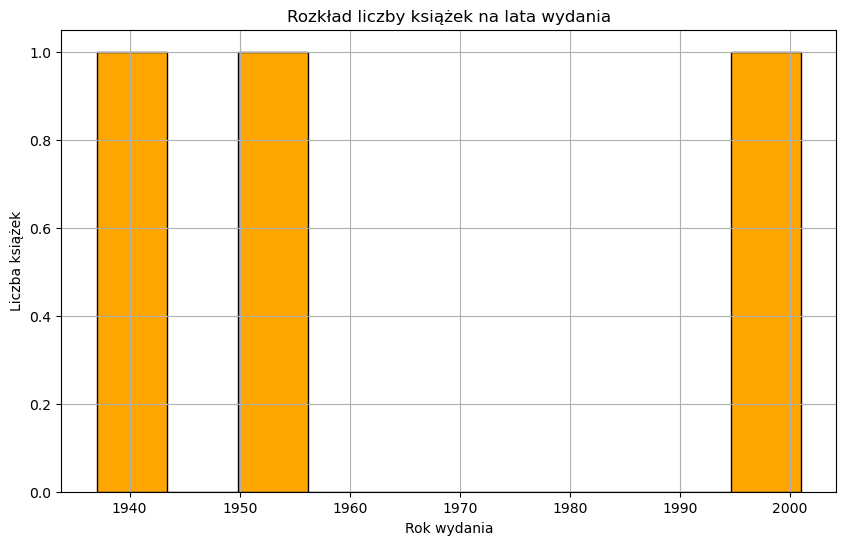

In [296]:
histogram_publication_years()

---